# IBM Data Science Capstone Project

This notebook contains the step by step code for IBM's Data Science Capstone Project. A successful business owner plans to open a hotel in Tallinn, Estonia. Besides providing accomodation facility to visitors, he primarily focuses local community and wants to provide them multicultural food options at a single place. 

The goal is to find the optimal place for such a business plan using an unsupervised machine learning algorithm. Here K-means clustering is used for this purpose.
To achieve this goal, list of neighboorhoods or sub-districts, their geo-coordinates, and top venues in them are required. 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

# !conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Required libraries imported')

Required libraries imported


## Creating dataframe that contains names of sub-districts in Tallinn Estonia

In [2]:
data = {'Sub-district':['Aegna','Astangu','Haabersti','Hiiu','Iru','Järve','Juhkentali','Kadaka','Kadriorg','Kakumäe',
                       'Kalamaja','Karjamaa','Kassisaba','Katleri','Keldrimäe','Kelmiküla','Kitseküla','Kivimäe','Kloostrimetsa',
                        'Kompassi','Kopli','Kose','Kurepõllu','Kuristiku','Laagna','Laagri','Laiaküla','Lepiku','Liiva',
                        'Lilleküla','Loopealse','Luite','Maakri','Maarjamäe','Mäeküla','Mähe','Männiku','Merimetsa','Merivälja',
                       'Mõigu','Mustakivi','Mustamäe','Mustjõe','Nõmme','õismäe','Pääsküla','Pae','Paevälja','Paljassaare',
                       'Pelgulinn','Pelguranna','Pikaliiva','Pirita','Priisle','Rahumäe','Raua','Raudalu','Rocca al Mare','Sääse',
                       'Sadama','Seli','Sibulaküla','Siili','Sikupilli','Sitsi','Sõjamäe','Südalinn','Tatari','Tiskre','Tondi',
                       'Tondiraba','Tõnismägi','Torupilli','Ülemiste','Lake Ülemiste','Uus Maailm','Uuslinn','Väike-õismäe',
                       'Vana-Mustamäe','Vanalinn','Väo','Veerenni','Veskimetsa','Vismeistri']}
tallinn_subdists = pd.DataFrame(data, columns = ['Sub-district'])
tallinn_subdists

,Sub-district
0,Aegna
1,Astangu
2,Haabersti
3,Hiiu
4,Iru
5,Järve
6,Juhkentali
7,Kadaka
8,Kadriorg
9,Kakumäe


In [3]:
# Define the dataframe columns
column_names = ['Sub-district', 'Latitude', 'Longitude'] 

# Creating new dataframe
tallinn = pd.DataFrame(columns=column_names)

tallinn

,Sub-district,Latitude,Longitude


## Foursquare API credentials

In [4]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:


## Getting coordinates of each sub-district

In [5]:
subdist = tallinn_subdists['Sub-district']
location = None
latitude = None
longitude = None

for data in range(0, len(subdist)):
    dt = subdist[data]
  
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode('{}, Tallinn'.format(dt))
    latitude = location.latitude
    longitude = location.longitude

    tallinn = tallinn.append({ 'Sub-district':dt,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)

In [6]:
tallinn

,Sub-district,Latitude,Longitude
0,Aegna,59.581319,24.757531
1,Astangu,59.402937,24.630661
2,Haabersti,59.431328,24.629042
3,Hiiu,59.382345,24.672648
4,Iru,59.459188,24.898411
5,Järve,59.398956,24.716329
6,Juhkentali,59.425699,24.770611
7,Kadaka,59.412797,24.677430
8,Kadriorg,59.438466,24.791025
9,Kakumäe,59.453371,24.581699


## Creating map of Tallinn with Folium

In [7]:
# Create map of Tallinn using latitude and longitude values
map_tallinn = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers to map
for lat, lng, subdistrict in zip(tallinn['Latitude'], tallinn['Longitude'], tallinn['Sub-district']):
    label = '{}'.format(subdistrict)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tallinn)  
    
map_tallinn

## Function to get all near by venues of each sub-district

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#         print(name)
            
        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Calling the function to collect venues data

In [12]:
tallinn_venues = getNearbyVenues(names=tallinn['Sub-district'],
                                   latitudes=tallinn['Latitude'],
                                   longitudes=tallinn['Longitude']
                                  )

In [13]:
print(tallinn_venues.shape)

(3331, 7)


In [14]:
tallinn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aegna,59.581319,24.757531,House of the Blackheads,59.585157,24.764115,Music Venue
1,Aegna,59.581319,24.757531,Põhjarand,59.585501,24.750149,Beach
2,Aegna,59.581319,24.757531,Aegna rändrahnud,59.581938,24.773533,Scenic Lookout
3,Aegna,59.581319,24.757531,Aegna grill,59.572338,24.756646,BBQ Joint
4,Astangu,59.402937,24.630661,NOY Grill & Lounge,59.406055,24.616954,Hookah Bar


## Counting and grouping by number of venues for each sub-district

In [15]:
tallinn_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aegna,4,4,4,4,4,4
Astangu,16,16,16,16,16,16
Haabersti,17,17,17,17,17,17
Hiiu,47,47,47,47,47,47
Iru,5,5,5,5,5,5
Juhkentali,79,79,79,79,79,79
Järve,51,51,51,51,51,51
Kadaka,47,47,47,47,47,47
Kadriorg,60,60,60,60,60,60


## Checking number of distinct venue categories

In [16]:
print('There are {} unique categories.'.format(len(tallinn_venues['Venue Category'].unique())))

There are 275 unique categories.


## Analyzing sub-districts

In [17]:
# One hot encoding
tallinn_onehot = pd.get_dummies(tallinn_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
tallinn_onehot['Neighborhood'] = tallinn_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [tallinn_onehot.columns[-1]] + list(tallinn_onehot.columns[:-1])
tallinn_onehot = tallinn_onehot[fixed_columns]

tallinn_onehot.head()

,Zoo,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cable Car,Cafeteria,Café,Camera Store,Candy Store,Capitol Building,Car Wash,Casino,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Venue,Neighborhood,New American Restaurant,Nightclub,Nursery School,Office,Opera House,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Tram Station,Tunnel,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
tallinn_onehot.shape

(3331, 275)

In [19]:
tallinn_grouped = tallinn_onehot.groupby('Neighborhood').mean().reset_index()
tallinn_grouped

,Neighborhood,Zoo,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bar,Basketball Court,Bathing Area,Beach,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Cable Car,Cafeteria,Café,Camera Store,Candy Store,Capitol Building,Car Wash,Casino,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,City Hall,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cruise Ship,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Forest,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Spring,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Venue,New American Restaurant,Nightclub,Nursery School,Office,Opera House,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Outlet Store,Paintball Field,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Pet Café,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pier,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Rental Car Location,Resort,Restaurant,River,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Ski Trail,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train,Train Station,Tram Station,Tunnel,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Aegna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000

In [20]:
tallinn_grouped.shape

(84, 275)

## Getting Top 10 venues of each sub-district

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tallinn_grouped['Neighborhood']

for ind in np.arange(tallinn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tallinn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(8)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aegna,BBQ Joint,Scenic Lookout,Music Venue,Beach,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Yoga Studio
1,Astangu,Bus Stop,Hookah Bar,Trail,Pedestrian Plaza,Paintball Field,Eastern European Restaurant,Bus Station,Shopping Mall,Motorcycle Shop,Spa
2,Haabersti,Bus Station,Bus Stop,Hardware Store,Eastern European Restaurant,Furniture / Home Store,Beach,Supermarket,Trail,Gym / Fitness Center,Garden Center
3,Hiiu,Bus Stop,Park,Bus Station,Café,Ski Area,Sporting Goods Shop,Pub,Train Station,Restaurant,Farmers Market
4,Iru,Grocery Store,Theme Park,Cosmetics Shop,Shopping Mall,Bus Station,Fair,Event Space,Exhibit,Fabric Shop,Farmers Market
5,Juhkentali,Sushi Restaurant,Restaurant,Hotel,Lounge,Café,Deli / Bodega,Tram Station,Thai Restaurant,Pizza Place,Gym / Fitness Center
6,Järve,Bus Stop,Café,Eastern European Restaurant,Furniture / Home Store,Tennis Court,Trail,Supermarket,Coffee Shop,Sporting Goods Shop,Sushi Restaurant
7,Kadaka,Supermarket,Shopping Mall,Café,Movie Theater,Sporting Goods Shop,Gym,Market,Pizza Place,Pub,Burger Joint


## Clustering neighbourhoods by using Machine Learning

K-means method is applied for clustering. Let's first find out the optimal number of clusters by using silhouette scores graph.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [24]:
max_range = 10

tallinn_grouped_clustering = tallinn_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = tallinn_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

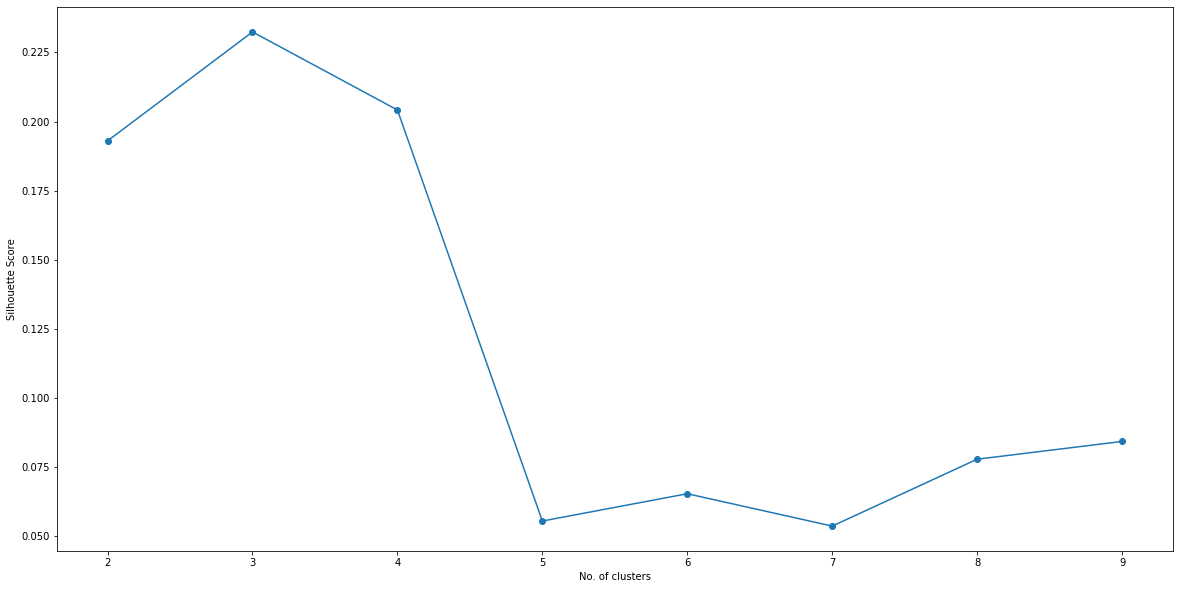

In [25]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

As we can see from the graph that the optimal number of clusters is 3 which we will use to run K-means clustering.

In [26]:
# Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(tallinn_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int32)

Let's create a new dataframe that includes the cluster and top 10 venues of each category.

In [27]:
tallinn.rename(columns={'Sub-district':'Neighborhood'}, inplace=True)
tallinn.head()

,Neighborhood,Latitude,Longitude
0,Aegna,59.581319,24.757531
1,Astangu,59.402937,24.630661
2,Haabersti,59.431328,24.629042
3,Hiiu,59.382345,24.672648
4,Iru,59.459188,24.898411


In [28]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tallinn_merged = tallinn

# Merge budapest_grouped with budapest_data to add latitude/longitude for each neighborhood
tallinn_merged = tallinn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tallinn_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aegna,59.581319,24.757531,1,BBQ Joint,Scenic Lookout,Music Venue,Beach,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Yoga Studio
1,Astangu,59.402937,24.630661,1,Bus Stop,Hookah Bar,Trail,Pedestrian Plaza,Paintball Field,Eastern European Restaurant,Bus Station,Shopping Mall,Motorcycle Shop,Spa
2,Haabersti,59.431328,24.629042,0,Bus Station,Bus Stop,Hardware Store,Eastern European Restaurant,Furniture / Home Store,Beach,Supermarket,Trail,Gym / Fitness Center,Garden Center
3,Hiiu,59.382345,24.672648,1,Bus Stop,Park,Bus Station,Café,Ski Area,Sporting Goods Shop,Pub,Train Station,Restaurant,Farmers Market
4,Iru,59.459188,24.898411,0,Grocery Store,Theme Park,Cosmetics Shop,Shopping Mall,Bus Station,Fair,Event Space,Exhibit,Fabric Shop,Farmers Market
5,Järve,59.398956,24.716329,1,Bus Stop,Café,Eastern European Restaurant,Furniture / Home Store,Tennis Court,Trail,Supermarket,Coffee Shop,Sporting Goods Shop,Sushi Restaurant
6,Juhkentali,59.425699,24.770611,1,Sushi Restaurant,Restaurant,Hotel,Lounge,Café,Deli / Bodega,Tram Station,Thai Restaurant,Pizza Place,Gym / Fitness Center
7,Kadaka,59.412797,24.677430,1,Supermarket,Shopping Mall,Café,Movie Theater,Sporting Goods Shop,Gym,Market,Pizza Place,Pub,Burger Joint
8,Kadriorg,59.438466,24.791025,1,Café,Restaurant,Park,Beach,Spa,Museum,Cosmetics Shop,Coffee Shop,Grocery Store,Art Museum
9,Kakumäe,59.453371,24.581699,0,Dessert Shop,Scenic Lookout,Athletics & Sports,Bus Station,Beach,Farmers Market,Exhibit,Fabric Shop,Fair,Yoga Studio


## Visualizing the clusters

In [29]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tallinn_merged['Latitude'], tallinn_merged['Longitude'], tallinn_merged['Neighborhood'], tallinn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster evaluation

### Cluster 0

In [30]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 0, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Haabersti,Bus Station,Bus Stop,Hardware Store,Eastern European Restaurant,Furniture / Home Store,Beach,Supermarket,Trail,Gym / Fitness Center,Garden Center
4,Iru,Grocery Store,Theme Park,Cosmetics Shop,Shopping Mall,Bus Station,Fair,Event Space,Exhibit,Fabric Shop,Farmers Market
9,Kakumäe,Dessert Shop,Scenic Lookout,Athletics & Sports,Bus Station,Beach,Farmers Market,Exhibit,Fabric Shop,Fair,Yoga Studio
17,Kivimäe,Bus Station,Pizza Place,Pharmacy,Grocery Store,Toy / Game Store,Park,Music Venue,Trail,Office,Bus Stop
21,Kose,Market,Bus Station,Moving Target,Bus Stop,Trail,Restaurant,Beach,Café,Volleyball Court,Park
34,Mäeküla,Flower Shop,Trail,Yoga Studio,Fair,English Restaurant,Escape Room,Event Space,Exhibit,Fabric Shop,Farmers Market
35,Mähe,Scenic Lookout,Food Service,Moving Target,Outdoors & Recreation,Bus Station,Yoga Studio,Fabric Shop,Escape Room,Event Space,Exhibit
45,Pääsküla,Bus Station,Trail,Train Station,Skate Park,Food & Drink Shop,Cable Car,Grocery Store,Restaurant,Garden Center,Pool
47,Paevälja,Museum,Bus Station,Moving Target,Playground,Soccer Field,Brewery,Shopping Mall,Supermarket,Resort,Fabric Shop
48,Paljassaare,Bus Station,Boat or Ferry,Tram Station,Electronics Store,Bus Stop,Supermarket,Bar,Gun Range,Convenience Store,Health Food Store


### Cluster 1

In [31]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 1, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aegna,BBQ Joint,Scenic Lookout,Music Venue,Beach,Escape Room,Event Space,Exhibit,Fabric Shop,Fair,Yoga Studio
1,Astangu,Bus Stop,Hookah Bar,Trail,Pedestrian Plaza,Paintball Field,Eastern European Restaurant,Bus Station,Shopping Mall,Motorcycle Shop,Spa
3,Hiiu,Bus Stop,Park,Bus Station,Café,Ski Area,Sporting Goods Shop,Pub,Train Station,Restaurant,Farmers Market
5,Järve,Bus Stop,Café,Eastern European Restaurant,Furniture / Home Store,Tennis Court,Trail,Supermarket,Coffee Shop,Sporting Goods Shop,Sushi Restaurant
6,Juhkentali,Sushi Restaurant,Restaurant,Hotel,Lounge,Café,Deli / Bodega,Tram Station,Thai Restaurant,Pizza Place,Gym / Fitness Center
7,Kadaka,Supermarket,Shopping Mall,Café,Movie Theater,Sporting Goods Shop,Gym,Market,Pizza Place,Pub,Burger Joint
8,Kadriorg,Café,Restaurant,Park,Beach,Spa,Museum,Cosmetics Shop,Coffee Shop,Grocery Store,Art Museum
10,Kalamaja,Restaurant,Burger Joint,Wine Bar,Bakery,Café,Park,Beer Bar,Bar,Theater,Scenic Lookout
11,Karjamaa,Bus Stop,Bakery,Harbor / Marina,Supermarket,Bar,Bus Station,Convenience Store,Lounge,Restaurant,Shopping Mall
12,Kassisaba,Café,Restaurant,Hotel,Scenic Lookout,Park,Eastern European Restaurant,Coffee Shop,Wine Bar,Pub,Gym / Fitness Center


### Cluster 2

In [32]:
tallinn_merged.loc[tallinn_merged['Cluster Labels'] == 2, tallinn_merged.columns[[0] + list(range(4, tallinn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Laiaküla,Restaurant,Scenic Lookout,Trail,Smoke Shop,Bus Stop,Bus Station,Yoga Studio,English Restaurant,Escape Room,Event Space
27,Lepiku,Restaurant,Scenic Lookout,Trail,Smoke Shop,Bus Stop,Yoga Studio,Electronics Store,English Restaurant,Escape Room,Event Space
52,Pirita,Scenic Lookout,Restaurant,Garden,Bus Stop,Trail,River,Botanical Garden,Smoke Shop,Farmers Market,Fair


## Conclusion

Looking into the cluster data, one can figure out that cluster 1 is the most suitable option. If we look deep into the map, center of this cluster is more populated. Based on this, we can suggest the business owner to open his hotel in the heart of cluster 1.